In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 后验概率

$$P(c \mid \boldsymbol{x}) = \frac{ P(c)P(\boldsymbol{x} \mid c)}{ P(\boldsymbol{x}) }$$

1、我认为不直接根据频率算$P(c \mid \boldsymbol{x})$的原因是：固定x的值，在训练样本中很难找到其对应不同类别的样本，因为`未被观测到`与`出现概率为零`通常是不同的

2、那能不能直接假设$P(c \mid \boldsymbol{x})$具有某种确定的概率分布形式呢？
我觉得不行，因为一般而言，c的取值可能性远远小于$\boldsymbol{x}$，当$\boldsymbol{x}$是连续值时，更不可行。

#### 那么就只能去估计$P(\boldsymbol{x}\mid c)$

对于参数估计，有2种方案：频率主义学派(认为概率分布的参数是固定的)、贝叶斯学派。

#### 极大似然估计（频率主义学派）

In [10]:
tmp = {'x':[1,2,3,4,5,6],
       'c':[0,0,0,1,1,0]}
df = pd.DataFrame(tmp,columns=['x','c'])

In [11]:
df

,x,c
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
5,6,0


假设$p(\boldsymbol{x} \mid c) \sim \mathcal{N}(\boldsymbol{\mu}_c,\boldsymbol{\sigma}^2_c)$ 

参数的极大似然估计为：$\widehat{\boldsymbol{\mu}}_c = mean(\boldsymbol{x})$, $\widehat{\boldsymbol{\sigma}}^2_c = mean((\boldsymbol{x}-\widehat{\boldsymbol{\mu}}_c)^2)$ (由求导得出)

In [15]:
#正态分布的概率密度函数。可以理解成 x 是 mu（均值）和 sigma（标准差）的函数
def normfun(x,mu,sigma_2):
    pdf = np.exp(-((x - mu)**2)/(2*sigma_2)) / (np.sqrt(2*np.pi*sigma_2))
    return pdf

c = 0时

In [27]:
mu = df[df['c']==0]['x'].mean()
sigma_2 = ((df[df['c']==0]['x']-mu)**2).mean()
print(mu,sigma_2)

3.0 3.5


0    1
1    2
2    3
5    6
Name: x, dtype: int64


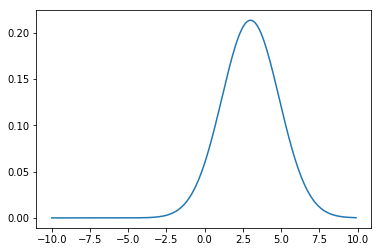

In [29]:
# 设定 x 轴前两个数字是 X 轴的开始和结束，第三个数字表示步长，或者区间的间隔长度
x = np.arange(-10,10,0.1) 
#设定 y 轴，载入刚才的正态分布函数
y = normfun(x, mu, sigma_2)
plt.plot(x,y)
print(df[df['c']==0]['x'])